In [32]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# load the dataset and columns of request type
dataset = '311_data.csv'
df = pd.read_csv(dataset, usecols=["request_type_name"])

In [20]:
unique_request_types = df['request_type_name'].unique()
unique_request_types_list = unique_request_types.tolist()
print(unique_request_types_list)

['Park Shelter', 'Illegal Parking', 'City Facility', 'Thank You - 311', "Mayor's Office", 'Discrimination/Unfair Practices', 'Police Department', 'City Source (CDBG)', 'Missed Refuse Pick Up', 'Pruning (city tree)', 'Americans with Disabilities', 'Bike Lane Bollard', 'Thank you - Finance', 'Vacant Lot', 'Misconduct/City Employee', 'Property Purchase', 'Real Estate Tax', 'Police Cameras', 'Weeds/Debris', 'SPIN (Stand Up) Scooters', 'Recycling Questions', 'Public Works Department', 'Tenant/Landlord Problems', 'Park Ranger', 'Abandoned Vehicle (parked on street)', 'Neighborhood Issues', 'Playground', 'Thank You', 'City Owned Property Maintenance', 'Early Set Out', 'ADA Ramp, Installation', 'Crosswalk, New', 'PWSA Billing or Shut Off', 'Homeless', 'Litter, Public Property', 'Bulk Pick Up', 'Blue Bin Containers', 'Illegal Dumping', 'City Cuts Application Request', 'Vacant Building', 'City Council', 'Trail Maintenance', 'Bicycle Parking', 'Handicap Parking Signs, Removal', 'Thank You - PWSA'

In [54]:
# load the dataset and columns with interest
addataset = '311_data.csv'
df = pd.read_csv(addataset, usecols=[
    'group_id', 'num_requests', 'status_code', 'request_type_name','request_type_id',
    'create_date_et', 'closed_date_et', 'neighborhood'])

In [55]:
df

,group_id,num_requests,status_code,request_type_name,request_type_id,create_date_et,closed_date_et,neighborhood
0,827262,1,0,Park Shelter,543,2024-03-12T10:50:00,NaN,NaN
1,720661,1,0,Park Shelter,543,2023-03-20T07:52:00,NaN,NaN
2,722010,1,0,Park Shelter,543,2023-03-24T07:44:00,NaN,NaN
3,846915,1,0,Illegal Parking,417,2024-05-19T12:24:00,NaN,NaN
4,853708,1,0,City Facility,375,2024-06-06T23:04:00,NaN,NaN
...,...,...,...,...,...,...,...,...
791525,903365,1,0,Mayor's Office,281,2024-11-14T17:02:00,NaN,NaN
791526,903381,1,0,Street Light - Repair,8715,2024-11-14T18:47:00,NaN,Lower Lawrenceville
791527,903380,1,0,Street Light - Repair,8715,2024-11-14T18:42:00,NaN,Lower Lawrenceville
791528,903378,1,0,Missed Refuse Pick Up,507,2024-11-14T18:20:00,NaN,Brighton Heights


In [56]:
# only select status code = 1, closed data
filtered_data = df[df['status_code'] == 1]

In [57]:
print(filtered_data.head())

     group_id  num_requests  status_code         request_type_name  \
106    885523             1            1           Vacant Building   
137    878582             1            1               Tree Issues   
176    882900             1            1  Street Cleaning/Sweeping   
347    875130             1            1              Weeds/Debris   
372    764990             1            1      Building Maintenance   

     request_type_id       create_date_et       closed_date_et neighborhood  
106            27522  2024-09-13T20:13:00  2024-09-23T15:05:00          NaN  
137            27521  2024-08-21T18:33:00  2024-10-08T13:04:00          NaN  
176              317  2024-09-05T09:41:00  2024-09-27T06:35:00          NaN  
347              410  2024-08-11T13:26:00  2024-10-10T11:06:00          NaN  
372            17302  2023-08-01T12:06:00  2024-11-13T02:10:00          NaN  


In [58]:
filtered_data.isna().sum()

group_id                 0
num_requests             0
status_code              0
request_type_name        0
request_type_id          0
create_date_et           0
closed_date_et           0
neighborhood         30435
dtype: int64

In [59]:
# delete column with na neighborhood
filtered_data = filtered_data.dropna()
filtered_data

,group_id,num_requests,status_code,request_type_name,request_type_id,create_date_et,closed_date_et,neighborhood
1916,364683,1,1,Building Without a Permit,436,2019-07-25T08:09:00,2024-11-07T10:04:00,Highland Park
2268,609425,1,1,Bridge Maintenance,24077,2022-02-16T08:23:00,2024-11-14T17:39:00,Highland Park
2940,522984,1,1,Retaining Wall (Public),821,2021-05-13T09:03:00,2024-11-01T14:20:00,Highland Park
3222,649283,1,1,Pruning (city tree),520,2022-06-26T10:30:00,2024-10-08T07:49:00,East Liberty
4123,645562,1,1,Pruning (city tree),520,2022-06-15T10:45:00,2024-11-08T09:40:00,Crawford-Roberts
...,...,...,...,...,...,...,...,...
791461,903329,1,1,Gang Activity,818,2024-11-14T15:49:00,2024-11-14T16:03:00,Central Business District
791462,903332,1,1,Americans with Disabilities,353,2024-11-14T15:51:00,2024-11-14T16:02:00,Central Business District
791464,903327,1,1,Police - Submit a Tip,687578,2024-11-14T15:47:00,2024-11-14T16:03:00,Central Business District
791468,903331,1,1,Business Accessibility,16215,2024-11-14T15:50:00,2024-11-14T16:02:00,Central Business District


In [60]:
filtered_data.isna().sum()

group_id             0
num_requests         0
status_code          0
request_type_name    0
request_type_id      0
create_date_et       0
closed_date_et       0
neighborhood         0
dtype: int64

In [61]:
# transfer date data type to datetime form
filtered_data['create_date_et'] = pd.to_datetime(filtered_data['create_date_et'])
filtered_data['closed_date_et'] = pd.to_datetime(filtered_data['closed_date_et'])

# calculate processing time
filtered_data['processing_time'] = (filtered_data['closed_date_et'] - filtered_data['create_date_et']).dt.total_seconds() / 86400  
print(filtered_data[['create_date_et', 'closed_date_et', 'processing_time']].head())


          create_date_et      closed_date_et  processing_time
1916 2019-07-25 08:09:00 2024-11-07 10:04:00      1932.079861
2268 2022-02-16 08:23:00 2024-11-14 17:39:00      1002.386111
2940 2021-05-13 09:03:00 2024-11-01 14:20:00      1268.220139
3222 2022-06-26 10:30:00 2024-10-08 07:49:00       834.888194
4123 2022-06-15 10:45:00 2024-11-08 09:40:00       876.954861


In [62]:
# output the file
output_file = 'processed_311_data.csv'
filtered_data.to_csv(output_file, index=False)

In [65]:
# group by neighborhood and calculate the average processing_time
neighborhood_avg_processing_time = filtered_data.groupby('neighborhood')['processing_time'].mean().reset_index()
neighborhood_avg_processing_time.columns = ['neighborhood', 'avg_processing_time']

# print the result
print(neighborhood_avg_processing_time.head())

# save as csv file
neighborhood_avg_processing_time.to_csv('neighborhood_avg_processing_time.csv', index=False)


        neighborhood  avg_processing_time
0   Allegheny Center           125.008088
1     Allegheny West            93.052154
2          Allentown           103.637082
3          Arlington            81.236084
4  Arlington Heights            65.923924


C:\Users\HP\AppData\Local\Temp\ipykernel_7504\3270791366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


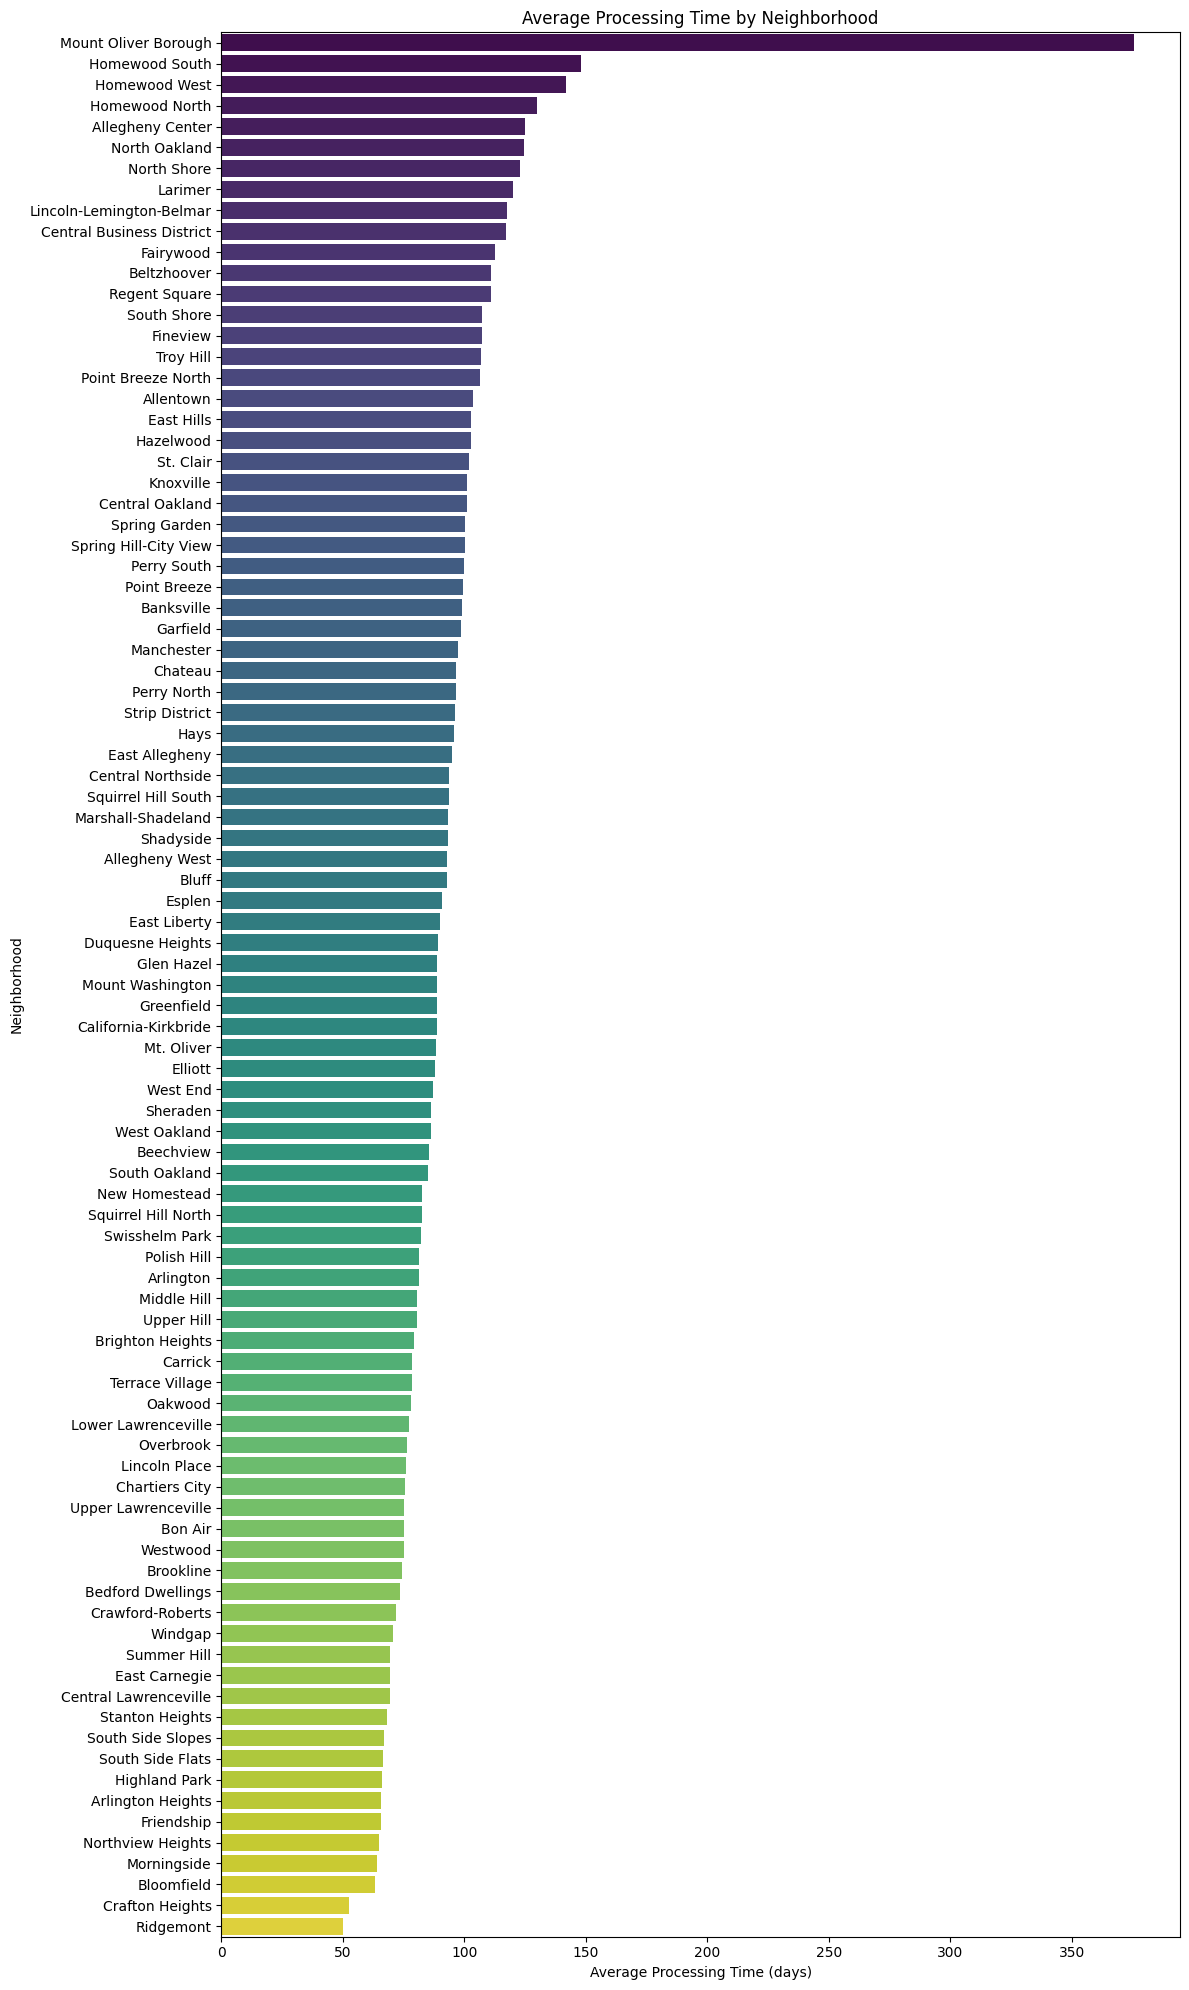

In [71]:
# plot the histogram of average processing time for different neighborhood
plt.figure(figsize=(12, 20))
sns.barplot(
    data=neighborhood_avg_processing_time.sort_values(by='avg_processing_time', ascending=False),
    x='avg_processing_time',
    y='neighborhood',
    palette='viridis'
)
plt.title('Average Processing Time by Neighborhood')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

In [72]:
# group by request_type_name and calculate average processing_time
request_type_avg_processing_time = filtered_data.groupby('request_type_name')['processing_time'].mean().reset_index()
request_type_avg_processing_time.columns = ['request_type_name', 'avg_processing_time']

print(request_type_avg_processing_time.head())
request_type_avg_processing_time.to_csv('request_type_avg_processing_time.csv', index=False)

                      request_type_name  avg_processing_time
0                       911 Performance             1.406093
1                ADA Ramp, Installation           243.856800
2                     Abandoned Vehicle           197.567563
3        Abandoned Vehicle (DO NOT USE)           387.090972
4  Abandoned Vehicle (parked on street)           185.760009


C:\Users\HP\AppData\Local\Temp\ipykernel_7504\385668082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


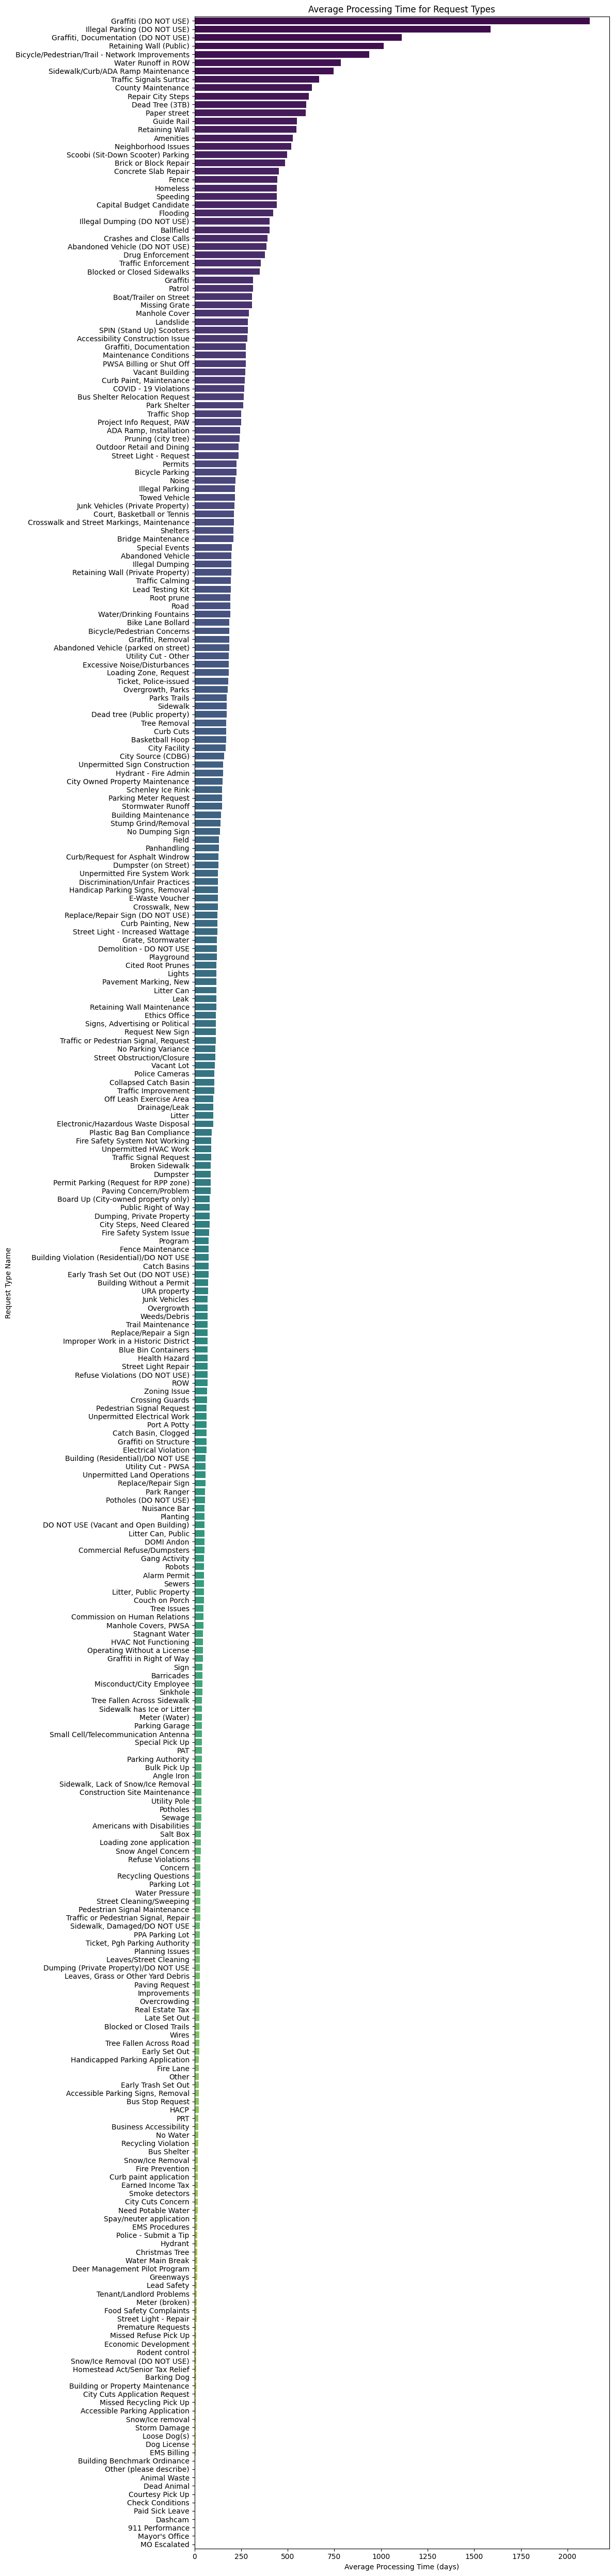

In [77]:
# plot the histogram of average processing time for different request type
plt.figure(figsize=(12, 50))
sns.barplot(
    data=request_type_avg_processing_time.sort_values(by='avg_processing_time', ascending=False),
    x='avg_processing_time',
    y='request_type_name',
    palette='viridis'
)
plt.title('Average Processing Time for Request Types')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Request Type Name')
plt.tight_layout()
plt.show()

In [78]:
# 1. select features and target
features = ['neighborhood', 'request_type_id'] 
target = 'processing_time'

# use OneHotEncoder on type features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(filtered_data[features])  # 对两个类别型特征同时编码
encoded_feature_names = encoder.get_feature_names_out(features)

# Transfer to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# 3. define target
y = filtered_data[target]

# 4. divide training and test dataset
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# 5. training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. estimate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# save the result
results = X_test.copy()
results['predicted_processing_time'] = y_pred
results['actual_processing_time'] = y_test.values
results.to_csv('linear_regression_results_with_id.csv', index=False)


Mean Squared Error (MSE): 51870.81321851743
Mean Absolute Error (MAE): 102.98465432534313


In [37]:
# want to check the statistic feature of processing time because the model is so bad
processing_time_stats = filtered_data['processing_time'].describe()
print(processing_time_stats)

count    700310.000000
mean         88.736138
std         249.883564
min           0.000000
25%           1.785417
50%           8.035417
75%          44.253125
max        3298.970833
Name: processing_time, dtype: float64


In [38]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Try another model LightGBM model through internet example

# initialize the LightGBM model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# train the model
lgbm_model.fit(X_train, y_train)

# predict and evaluate
y_pred_lgbm = lgbm_model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM - MSE: {mse_lgbm:.4f}, MAE: {mae_lgbm:.4f}, R²: {r2_lgbm:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 560248, number of used features: 92
[LightGBM] [Info] Start training from score 88.750594
LightGBM - MSE: 61302.1444, MAE: 122.9270, R²: 0.0047


In [ ]:
# The model is also very bad...